In [1]:
from _util import *
import _analyzer as analyzer
reload(analyzer)
from matplotlib.transforms import BlendedGenericTransform
import matplotlib.gridspec as gridspec

# import shutil
# shutil.rmtree("res/0316") /
# shutil.rmtree("fig/0327") 
# !tar -czf fig.tar.gz fig/0429/_N50_T100_K5_p10_sigma2

# 1std = .8413 -> 68
# 0.5 std = .6915 -> 38
# 0.25 std = .5987 -> 19.74

# a = load(path)
# n_reps = sum(a['record']['data_plot_BR_original']['time'] == a['record']['data_plot_BR_original']['time'].max()) / 4
# print('n_reps = {}'.format(int(n_reps)))

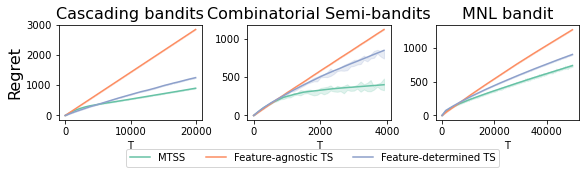

In [29]:
l = 3

reload(analyzer)
fig, axs = plt.subplots(1, l)
plt.rcParams["figure.figsize"] = [8, 2]
plt.tight_layout()
# fig.suptitle(title, size = 30) 
fig.subplots_adjust(top=0.85)

path_cascading = 'phi_beta0.002_Bandit_typeCascading_with_intercept1_Sigma_gamma_factor20_Sigma_x_factor1_MTS_freq500_GLB_freq500_n_init300_alpha_GLB1_used_agendsall_LB_freq1_regret_type0-Cascading_real'
path_semi = 'Bandit_typeSemiBandit_sigma_10.04_sigma_21_with_intercept0_Sigma_gamma_factor1_Sigma_x_factor1_MTS_freq300_GLB_freq100_n_init300_alpha_GLB1_used_agendsall_LB_freq1_n_female4205-SemiBandit_Real'
path_MNL = 'MNL_L2818_T50000_K10_p20'
paths = [path_cascading, path_semi, path_MNL]
titles = ['Cascading bandits', 'Combinatorial Semi-bandits', 'MNL bandit']
labels_all = {}
for i in range(l):
    #phi_beta
    if i == 0:
        ylabel = 'Regret'
    else:
        ylabel = None
    
    handles, labels = analyzer.load_and_plot_ax(paths[i], ax = axs[i], target = 'BR'
                  , plot_mean = 0, title = titles[i]
                  , skip_methods = None, freq = 100
                  , skip = 0, ylabel = ylabel, ylabel_size = 16, title_size = 16
                  , ci = 38 #None
                  , names = ["Meta TS (Ours)", "Feature-agnostic TS", "Feature-determined TS"] # "Oracle TS", 
                  , y_min = None, y_max = None)
    labels_all[i] = labels
labels = labels_all[0]
labels[labels.index("Meta TS (Ours)")] = "MTSS"
fig.legend(handles, labels, loc='lower center', ncol = len(labels)
#             , bbox_to_anchor = [1.2, -0.6] # location # 0.4 for my plot
          , bbox_to_anchor = [0.5, -0.55]
        , bbox_transform = BlendedGenericTransform(fig.transFigure, axs[1].transAxes)
               )
###########
fig.savefig("Real_Large.pdf"
                   , bbox_inches= "tight", dpi = 200, format = 'pdf')


In [44]:
path_cascading = 'phi_beta0.002_Bandit_typeCascading_with_intercept1_Sigma_gamma_factor20_Sigma_x_factor1_MTS_freq500_GLB_freq500_n_init300_alpha_GLB1_used_agendsall_LB_freq1_regret_type0-Cascading_real'
path_semi = 'Bandit_typeSemiBandit_sigma_10.04_sigma_21_with_intercept0_Sigma_gamma_factor1_Sigma_x_factor1_MTS_freq300_GLB_freq100_n_init300_alpha_GLB1_used_agendsall_LB_freq1_n_female4205-SemiBandit_Real'
path_MNL = 'MNL_L2818_T50000_K10_p20'
paths = [path_cascading, path_semi, path_MNL]

varing_params = ['Cascading bandits', 'Combinatorial Semi-bandits', 'MNL bandit']
summary_table = dict()
for i in range(3):   
    path = paths[i]
    a = load(path)
    data_plot_BR = a['record']['data_plot_BR_original'].copy()
    #data_plot_BR.regret = data_plot_BR.regret / (data_plot_BR.time + 1)
    #data_plot_BR = data_plot_BR[data_plot_BR.time % 100 == 0]
    
    summary = []
    for method in ['Meta TS (Ours)', 'Feature-agnostic TS', 'Feature-determined TS']:
        out = []
        tot_rep = len(data_plot_BR[data_plot_BR.method==method])/data_plot_BR[data_plot_BR.method==method].time.max()
        T = data_plot_BR[data_plot_BR.method==method].time.max()
        print(tot_rep)
        for rep in range(int(tot_rep)):
            total = data_plot_BR[(data_plot_BR.method==method) & (data_plot_BR.time==T-1)].regret
            out.append(total)
        summary.append(pd.Series({'method':method, 'mean':np.mean(out), 'SD':np.std(out)/10}))
    
    summary_table[varing_params[i]] = pd.DataFrame(summary)

20.0010000500025
20.0010000500025
20.0010000500025
12.003000750187548
12.003000750187548
12.003000750187548
10.00020000400008
10.00020000400008
10.00020000400008


In [45]:
summary_table['Cascading bandits'].round(2)

,method,mean,SD
0,Meta TS (Ours),911.44,9.19
1,Feature-agnostic TS,2878.25,0.07
2,Feature-determined TS,1265.47,8.64


In [46]:
summary_table['Combinatorial Semi-bandits'].round(2)

,method,mean,SD
0,Meta TS (Ours),403.53,39.80
1,Feature-agnostic TS,1147.37,0.35
2,Feature-determined TS,864.43,27.46


In [47]:
summary_table['MNL bandit'].round(2)

,method,mean,SD
0,Meta TS (Ours),742.99,7.54
1,Feature-agnostic TS,1278.08,1.30
2,Feature-determined TS,909.35,3.73
